# Chapter 11: Time Series

In [1]:
import numpy as np
import pandas as pd

## 11.1: Date and Time Data Types and Tools

In [2]:
from datetime import datetime

In [3]:
now=datetime.now()
now

datetime.datetime(2024, 7, 15, 14, 33, 38, 758653)

In [4]:
now.year,now.month,now.day

(2024, 7, 15)

In [5]:
delta=datetime(2011,1,7)-datetime(2008,6,24,7,15)
delta

datetime.timedelta(days=926, seconds=60300)

In [6]:
delta.days

926

In [7]:
delta.seconds

60300

In [8]:
from datetime import timedelta

In [9]:
start=datetime(2011,1,7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [10]:
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [12]:
stamp=datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
str(stamp)

'2011-01-03 00:00:00'

In [14]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [15]:
value="2011-01-03"
datetime.strptime(value,"%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
datestrs=["7/6/2011","8/6/2011"]
[datetime.strptime(x,"%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [17]:
datestrs=["2011-07-06 12:00:00","2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [18]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [19]:
idx[2]

NaT

In [20]:
pd.isna(idx)

array([False, False,  True])

## 11.2: Time Series Basics

In [21]:
dates=[datetime(2011,1,2),datetime(2011,1,5),
       datetime(2011,1,7),datetime(2011,1,8),
       datetime(2011,1,10),datetime(2011,1,12)]

ts=pd.Series(np.random.standard_normal(6),index=dates)#

ts

2011-01-02    0.168858
2011-01-05   -1.914051
2011-01-07   -0.709027
2011-01-08    1.423602
2011-01-10   -0.364973
2011-01-12    0.564880
dtype: float64

In [22]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ts+ts[::2]

2011-01-02    0.337716
2011-01-05         NaN
2011-01-07   -1.418055
2011-01-08         NaN
2011-01-10   -0.729946
2011-01-12         NaN
dtype: float64

In [24]:
ts.index.dtype

dtype('<M8[ns]')

In [25]:
stamp=ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [26]:
stamp=ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [27]:
ts[stamp]

-0.7090274945381249

In [28]:
ts["2011-01-10"]

-0.36497293915873263

In [29]:
longer_ts=pd.Series(np.random.standard_normal(1000),index=pd.date_range("2000-01-01",periods=1000))
longer_ts

2000-01-01   -0.822558
2000-01-02    1.887815
2000-01-03   -1.141979
2000-01-04    1.093665
2000-01-05    1.147602
                ...   
2002-09-22   -0.169748
2002-09-23   -0.486390
2002-09-24    0.039053
2002-09-25   -0.651990
2002-09-26    1.016129
Freq: D, Length: 1000, dtype: float64

In [30]:
longer_ts["2001"]

2001-01-01   -1.805820
2001-01-02    0.762622
2001-01-03    0.299088
2001-01-04   -0.627387
2001-01-05    1.625293
                ...   
2001-12-27   -0.098624
2001-12-28   -0.085421
2001-12-29   -0.258121
2001-12-30   -0.091227
2001-12-31    1.095212
Freq: D, Length: 365, dtype: float64

(array([ 13.,  34.,  93., 171., 240., 217., 143.,  66.,  19.,   4.]),
 array([-2.96773298, -2.3552359 , -1.74273882, -1.13024174, -0.51774466,
         0.09475242,  0.7072495 ,  1.31974657,  1.93224365,  2.54474073,
         3.15723781]),
 <BarContainer object of 10 artists>)

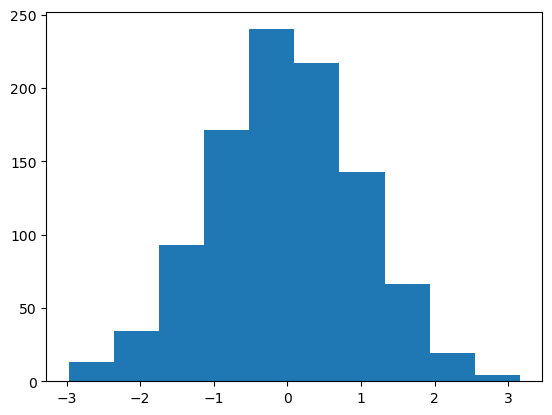

In [31]:
from matplotlib.pyplot import hist


hist(longer_ts)

In [32]:
longer_ts["2001-05"]

2001-05-01   -2.690455
2001-05-02    0.752369
2001-05-03    0.289208
2001-05-04   -0.692221
2001-05-05    0.274458
2001-05-06    0.621892
2001-05-07    0.423721
2001-05-08    1.077259
2001-05-09   -1.200947
2001-05-10   -0.634321
2001-05-11    0.630445
2001-05-12    0.110991
2001-05-13    0.654219
2001-05-14    0.271464
2001-05-15    0.184141
2001-05-16    0.386543
2001-05-17    0.376213
2001-05-18    2.113960
2001-05-19   -0.097482
2001-05-20   -0.849803
2001-05-21   -0.009967
2001-05-22   -0.966556
2001-05-23   -0.185486
2001-05-24    1.082486
2001-05-25   -0.229141
2001-05-26   -0.545785
2001-05-27   -0.187009
2001-05-28    0.930804
2001-05-29   -0.202693
2001-05-30   -0.634591
2001-05-31    0.444953
Freq: D, dtype: float64

In [33]:
ts

2011-01-02    0.168858
2011-01-05   -1.914051
2011-01-07   -0.709027
2011-01-08    1.423602
2011-01-10   -0.364973
2011-01-12    0.564880
dtype: float64

In [34]:
ts[datetime(2011,1,7):]

2011-01-07   -0.709027
2011-01-08    1.423602
2011-01-10   -0.364973
2011-01-12    0.564880
dtype: float64

In [35]:
ts[datetime(2011,1,7):datetime(2011,1,10)]

2011-01-07   -0.709027
2011-01-08    1.423602
2011-01-10   -0.364973
dtype: float64

In [36]:
ts

2011-01-02    0.168858
2011-01-05   -1.914051
2011-01-07   -0.709027
2011-01-08    1.423602
2011-01-10   -0.364973
2011-01-12    0.564880
dtype: float64

In [37]:
ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.709027
2011-01-08    1.423602
2011-01-10   -0.364973
dtype: float64

In [38]:
ts.truncate(after="2011-01-09")

2011-01-02    0.168858
2011-01-05   -1.914051
2011-01-07   -0.709027
2011-01-08    1.423602
dtype: float64

In [39]:
dates=pd.date_range("2000-01-01",periods=100,freq="W-WED")
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [40]:
long_df=pd.DataFrame(np.random.standard_normal((100,4)),index=dates,columns=["Colorado","Texas","New York","Ohio"])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.064606,0.568138,0.952953,-0.852050
2000-01-12,-0.924035,-0.867348,-0.177823,-0.970582
2000-01-19,-0.645292,0.326351,1.477802,-0.240000
2000-01-26,1.218414,-1.342766,-0.729091,0.653925
2000-02-02,-0.050121,1.185138,-0.464155,-0.025399
...,...,...,...,...
2001-10-31,0.106753,1.551883,-0.384201,-2.327941
2001-11-07,-0.587166,-1.940864,0.017950,-0.846739
2001-11-14,1.184828,0.435180,-0.231676,0.128175
2001-11-21,0.029705,-0.918252,0.444045,-0.770472


In [41]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,0.706214,-0.689779,1.823871,-0.280407
2001-05-09,0.238583,0.884702,-1.320546,0.203292
2001-05-16,-0.374256,-0.985383,0.111901,-0.275600
2001-05-23,-1.125631,0.309637,0.314590,0.351318
2001-05-30,0.403728,-0.627696,-1.579397,0.107471


### Time Series with Duplicate Indices

In [42]:
dates=pd.DatetimeIndex(["2000-01-01","2000-01-02","2000-01-02","2000-01-02","2000-01-03"])
dup_ts=pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [43]:
dup_ts.index.is_unique

False

In [44]:
dup_ts["2000-01-03"]

4

In [45]:
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [46]:
grouped=dup_ts.groupby(level=0)
list(grouped)

[(Timestamp('2000-01-01 00:00:00'),
  2000-01-01    0
  dtype: int32),
 (Timestamp('2000-01-02 00:00:00'),
  2000-01-02    1
  2000-01-02    2
  2000-01-02    3
  dtype: int32),
 (Timestamp('2000-01-03 00:00:00'),
  2000-01-03    4
  dtype: int32)]

In [47]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [48]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3: Date Ranges, Frequencies, and Shifting

In [49]:
ts

2011-01-02    0.168858
2011-01-05   -1.914051
2011-01-07   -0.709027
2011-01-08    1.423602
2011-01-10   -0.364973
2011-01-12    0.564880
dtype: float64

In [50]:
resampler=ts.resample("D")
resampler

In [51]:
list(resampler)

[(Timestamp('2011-01-02 00:00:00'),
  2011-01-02    0.168858
  dtype: float64),
 (Timestamp('2011-01-03 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-04 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-05 00:00:00'),
  2011-01-05   -1.914051
  dtype: float64),
 (Timestamp('2011-01-06 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-07 00:00:00'),
  2011-01-07   -0.709027
  dtype: float64),
 (Timestamp('2011-01-08 00:00:00'),
  2011-01-08    1.423602
  dtype: float64),
 (Timestamp('2011-01-09 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-10 00:00:00'),
  2011-01-10   -0.364973
  dtype: float64),
 (Timestamp('2011-01-11 00:00:00'), Series([], dtype: float64)),
 (Timestamp('2011-01-12 00:00:00'),
  2011-01-12    0.56488
  dtype: float64)]

### Generating Date Ranges

In [52]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [53]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range("2024-01-07", "2024-12-07", freq="BM")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\713657161.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2024-01-07", "2024-12-07", freq="BM")


DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-29', '2024-04-30',
               '2024-05-31', '2024-06-28', '2024-07-31', '2024-08-30',
               '2024-09-30', '2024-10-31', '2024-11-29'],
              dtype='datetime64[ns]', freq='BME')

In [56]:
pd.date_range("2012-05-02 12:56:31", periods=5)


DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [58]:
from pandas.tseries.offsets import Hour,Minute

In [59]:
hour=Hour()

In [60]:
hour

<Hour>

In [61]:
four_hours=Hour(4)
four_hours

<4 * Hours>

In [62]:
pd.date_range("2000-01-01","2000-01-03 23:59",freq="4H")


C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\4288980852.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01","2000-01-03 23:59",freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [63]:
Hour(2)+Minute(30)

<150 * Minutes>

In [64]:
pd.date_range("2000-01-01",periods=10,freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

#### Week of month dates

In [65]:
monthly_dates=pd.date_range("2024-01-01","2024-12-31",freq="WOM-3Fri")
monthly_dates

DatetimeIndex(['2024-01-19', '2024-02-16', '2024-03-15', '2024-04-19',
               '2024-05-17', '2024-06-21', '2024-07-19', '2024-08-16',
               '2024-09-20', '2024-10-18', '2024-11-15', '2024-12-20'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Shifting (Leading and Lagging) Data

In [66]:
ts=pd.Series(np.random.standard_normal(4),index=pd.date_range("2000-01-01",periods=4,freq="M"))
ts

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\4197551884.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts=pd.Series(np.random.standard_normal(4),index=pd.date_range("2000-01-01",periods=4,freq="M"))


2000-01-31    0.359888
2000-02-29   -0.655840
2000-03-31   -0.796080
2000-04-30   -0.561180
Freq: ME, dtype: float64

In [67]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.359888
2000-04-30   -0.655840
Freq: ME, dtype: float64

In [68]:
ts.shift(-2)

2000-01-31   -0.79608
2000-02-29   -0.56118
2000-03-31        NaN
2000-04-30        NaN
Freq: ME, dtype: float64

In [69]:
ts/ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -2.822347
2000-03-31    0.213832
2000-04-30   -0.295071
Freq: ME, dtype: float64

In [70]:
ts
ts.shift(1)

2000-01-31    0.359888
2000-02-29   -0.655840
2000-03-31   -0.796080
2000-04-30   -0.561180
Freq: ME, dtype: float64

2000-01-31         NaN
2000-02-29    0.359888
2000-03-31   -0.655840
2000-04-30   -0.796080
Freq: ME, dtype: float64

In [71]:
0.33/1.74

0.18965517241379312

In [72]:
ts.shift(2,freq="M")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\500384683.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2,freq="M")


2000-03-31    0.359888
2000-04-30   -0.655840
2000-05-31   -0.796080
2000-06-30   -0.561180
Freq: ME, dtype: float64

In [73]:
ts.shift(3,freq="D")

2000-02-03    0.359888
2000-03-03   -0.655840
2000-04-03   -0.796080
2000-05-03   -0.561180
dtype: float64

In [74]:
ts.shift(1, freq="90T")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\584021106.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


2000-01-31 01:30:00    0.359888
2000-02-29 01:30:00   -0.655840
2000-03-31 01:30:00   -0.796080
2000-04-30 01:30:00   -0.561180
dtype: float64

#### Shifting dates with offsets

In [75]:
from pandas.tseries.offsets import Day, MonthEnd

In [76]:
now=datetime(2011,11,17)

In [77]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [78]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [79]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [80]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [81]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [82]:
ts=pd.Series(np.random.standard_normal(20),index=pd.date_range("2000-01-15",periods=20,freq="4D"))
ts

2000-01-15   -1.228669
2000-01-19    1.094223
2000-01-23    0.966899
2000-01-27   -0.967935
2000-01-31    0.249657
2000-02-04    0.409125
2000-02-08    1.328343
2000-02-12    0.899014
2000-02-16   -0.864711
2000-02-20    0.103733
2000-02-24   -1.299929
2000-02-28   -1.198588
2000-03-03   -0.475573
2000-03-07   -3.302502
2000-03-11    0.325630
2000-03-15   -0.004847
2000-03-19    1.128079
2000-03-23   -0.392537
2000-03-27    1.963095
2000-03-31    1.641786
Freq: 4D, dtype: float64

In [83]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.022835
2000-02-29   -0.089002
2000-03-31    0.110391
dtype: float64

In [84]:
ts.resample("M").mean()

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31    0.022835
2000-02-29   -0.089002
2000-03-31    0.110391
Freq: ME, dtype: float64

## 11.4: Time Zone Handling

In [85]:
import pytz

In [86]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [87]:
tz=pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [88]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
dates

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [89]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00    0.060510
2012-03-10 09:30:00   -0.048020
2012-03-11 09:30:00   -0.226852
2012-03-12 09:30:00    0.605759
2012-03-13 09:30:00   -0.829625
2012-03-14 09:30:00   -0.221457
Freq: D, dtype: float64

In [90]:
print(ts.index.tz)

None


In [91]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [92]:
ts_utc=ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    0.060510
2012-03-10 09:30:00+00:00   -0.048020
2012-03-11 09:30:00+00:00   -0.226852
2012-03-12 09:30:00+00:00    0.605759
2012-03-13 09:30:00+00:00   -0.829625
2012-03-14 09:30:00+00:00   -0.221457
Freq: D, dtype: float64

In [93]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [94]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00    0.060510
2012-03-10 04:30:00-05:00   -0.048020
2012-03-11 05:30:00-04:00   -0.226852
2012-03-12 05:30:00-04:00    0.605759
2012-03-13 05:30:00-04:00   -0.829625
2012-03-14 05:30:00-04:00   -0.221457
Freq: D, dtype: float64

In [95]:
ts_utc.tz_convert("Europe/London")

2012-03-09 09:30:00+00:00    0.060510
2012-03-10 09:30:00+00:00   -0.048020
2012-03-11 09:30:00+00:00   -0.226852
2012-03-12 09:30:00+00:00    0.605759
2012-03-13 09:30:00+00:00   -0.829625
2012-03-14 09:30:00+00:00   -0.221457
Freq: D, dtype: float64

In [96]:
ts

2012-03-09 09:30:00    0.060510
2012-03-10 09:30:00   -0.048020
2012-03-11 09:30:00   -0.226852
2012-03-12 09:30:00    0.605759
2012-03-13 09:30:00   -0.829625
2012-03-14 09:30:00   -0.221457
Freq: D, dtype: float64

In [97]:
ts_eastern=ts.tz_localize("America/New_York")
ts_eastern

2012-03-09 09:30:00-05:00    0.060510
2012-03-10 09:30:00-05:00   -0.048020
2012-03-11 09:30:00-04:00   -0.226852
2012-03-12 09:30:00-04:00    0.605759
2012-03-13 09:30:00-04:00   -0.829625
2012-03-14 09:30:00-04:00   -0.221457
dtype: float64

In [98]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00    0.060510
2012-03-10 14:30:00+00:00   -0.048020
2012-03-11 13:30:00+00:00   -0.226852
2012-03-12 13:30:00+00:00    0.605759
2012-03-13 13:30:00+00:00   -0.829625
2012-03-14 13:30:00+00:00   -0.221457
dtype: float64

In [99]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00    0.060510
2012-03-10 15:30:00+01:00   -0.048020
2012-03-11 14:30:00+01:00   -0.226852
2012-03-12 14:30:00+01:00    0.605759
2012-03-13 14:30:00+01:00   -0.829625
2012-03-14 14:30:00+01:00   -0.221457
dtype: float64

In [100]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operatiosn with Time Zone-Aware Timestamp Objects

In [101]:
stamp=pd.Timestamp("2011-03-12 04:00")
stamp

Timestamp('2011-03-12 04:00:00')

In [102]:
stamp_utz=stamp.tz_localize("UTC")

In [103]:
stamp_utz

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [104]:
stamp_utz.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [105]:
stamp_moscow=pd.Timestamp("2011-03-12 04:00",tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [106]:
stamp_utz.value

1299902400000000000

In [107]:
stamp_utz.tz_convert("America/New_York").value

1299902400000000000

In [108]:
stamp=pd.Timestamp("2012-03-11 1:30",tz="US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [109]:
stamp+Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [110]:
stamp=pd.Timestamp("2012-11-04 00:30",tz="US/Eastern")
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [111]:
stamp.month

11

In [112]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [113]:
dates=pd.date_range("2012-03-07 09:30",periods=10,freq="B")
dates

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [114]:
ts=pd.Series(np.random.standard_normal(len(dates)),index=dates)
ts

2012-03-07 09:30:00    0.263492
2012-03-08 09:30:00   -0.699216
2012-03-09 09:30:00    0.955806
2012-03-12 09:30:00    1.510989
2012-03-13 09:30:00   -0.904883
2012-03-14 09:30:00    0.194109
2012-03-15 09:30:00    0.045565
2012-03-16 09:30:00   -1.253289
2012-03-19 09:30:00   -0.880870
2012-03-20 09:30:00    0.297288
Freq: B, dtype: float64

In [115]:
ts1=ts[:7].tz_localize("Europe/London")
ts2=ts[2:].tz_localize("Europe/Moscow")
ts1
ts2

2012-03-07 09:30:00+00:00    0.263492
2012-03-08 09:30:00+00:00   -0.699216
2012-03-09 09:30:00+00:00    0.955806
2012-03-12 09:30:00+00:00    1.510989
2012-03-13 09:30:00+00:00   -0.904883
2012-03-14 09:30:00+00:00    0.194109
2012-03-15 09:30:00+00:00    0.045565
dtype: float64

2012-03-09 09:30:00+04:00    0.955806
2012-03-12 09:30:00+04:00    1.510989
2012-03-13 09:30:00+04:00   -0.904883
2012-03-14 09:30:00+04:00    0.194109
2012-03-15 09:30:00+04:00    0.045565
2012-03-16 09:30:00+04:00   -1.253289
2012-03-19 09:30:00+04:00   -0.880870
2012-03-20 09:30:00+04:00    0.297288
dtype: float64

In [116]:
result=ts1+ts2
result
result.index

2012-03-07 09:30:00+00:00   NaN
2012-03-08 09:30:00+00:00   NaN
2012-03-09 05:30:00+00:00   NaN
2012-03-09 09:30:00+00:00   NaN
2012-03-12 05:30:00+00:00   NaN
2012-03-12 09:30:00+00:00   NaN
2012-03-13 05:30:00+00:00   NaN
2012-03-13 09:30:00+00:00   NaN
2012-03-14 05:30:00+00:00   NaN
2012-03-14 09:30:00+00:00   NaN
2012-03-15 05:30:00+00:00   NaN
2012-03-15 09:30:00+00:00   NaN
2012-03-16 05:30:00+00:00   NaN
2012-03-19 05:30:00+00:00   NaN
2012-03-20 05:30:00+00:00   NaN
dtype: float64

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 05:30:00+00:00', '2012-03-09 09:30:00+00:00',
               '2012-03-12 05:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 05:30:00+00:00', '2012-03-13 09:30:00+00:00',
               '2012-03-14 05:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 05:30:00+00:00', '2012-03-15 09:30:00+00:00',
               '2012-03-16 05:30:00+00:00', '2012-03-19 05:30:00+00:00',
               '2012-03-20 05:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [117]:
ts1

2012-03-07 09:30:00+00:00    0.263492
2012-03-08 09:30:00+00:00   -0.699216
2012-03-09 09:30:00+00:00    0.955806
2012-03-12 09:30:00+00:00    1.510989
2012-03-13 09:30:00+00:00   -0.904883
2012-03-14 09:30:00+00:00    0.194109
2012-03-15 09:30:00+00:00    0.045565
dtype: float64

In [118]:
ts2

2012-03-09 09:30:00+04:00    0.955806
2012-03-12 09:30:00+04:00    1.510989
2012-03-13 09:30:00+04:00   -0.904883
2012-03-14 09:30:00+04:00    0.194109
2012-03-15 09:30:00+04:00    0.045565
2012-03-16 09:30:00+04:00   -1.253289
2012-03-19 09:30:00+04:00   -0.880870
2012-03-20 09:30:00+04:00    0.297288
dtype: float64

In [119]:
ts1

2012-03-07 09:30:00+00:00    0.263492
2012-03-08 09:30:00+00:00   -0.699216
2012-03-09 09:30:00+00:00    0.955806
2012-03-12 09:30:00+00:00    1.510989
2012-03-13 09:30:00+00:00   -0.904883
2012-03-14 09:30:00+00:00    0.194109
2012-03-15 09:30:00+00:00    0.045565
dtype: float64

In [120]:
ts3=ts1.tz_convert("Europe/Moscow")
ts3

2012-03-07 13:30:00+04:00    0.263492
2012-03-08 13:30:00+04:00   -0.699216
2012-03-09 13:30:00+04:00    0.955806
2012-03-12 13:30:00+04:00    1.510989
2012-03-13 13:30:00+04:00   -0.904883
2012-03-14 13:30:00+04:00    0.194109
2012-03-15 13:30:00+04:00    0.045565
dtype: float64

In [121]:
ts1+ts3

2012-03-07 09:30:00+00:00    0.526984
2012-03-08 09:30:00+00:00   -1.398431
2012-03-09 09:30:00+00:00    1.911612
2012-03-12 09:30:00+00:00    3.021978
2012-03-13 09:30:00+00:00   -1.809766
2012-03-14 09:30:00+00:00    0.388218
2012-03-15 09:30:00+00:00    0.091130
dtype: float64

## 11.5: Periods and Period Arithemtic

In [122]:
p=pd.Period("2011",freq="A-DEC")
p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\2895720356.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p=pd.Period("2011",freq="A-DEC")


Period('2011', 'Y-DEC')

In [123]:
p+5

Period('2016', 'Y-DEC')

In [124]:
p-2

Period('2009', 'Y-DEC')

In [125]:
pd.Period("2014",freq="A-DEC")-p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\1575718699.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period("2014",freq="A-DEC")-p


<3 * YearEnds: month=12>

In [126]:
periods=pd.period_range("2000-01-01","2000-06-30",freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [127]:
pd.Series(np.random.standard_normal(6),index=periods)

2000-01   -0.348220
2000-02    0.898510
2000-03   -0.576734
2000-04    0.885919
2000-05   -0.118400
2000-06   -1.389306
Freq: M, dtype: float64

In [128]:
values=["2001Q3","2002Q2","2003Q1"]
index=pd.PeriodIndex(values,freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

In [129]:
p=pd.Period("2011",freq="A-DEC")
p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\2895720356.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p=pd.Period("2011",freq="A-DEC")


Period('2011', 'Y-DEC')

In [130]:
p.asfreq("M",how="start")

Period('2011-01', 'M')

In [131]:
p.asfreq("M",how="end")
p.asfreq("M")

Period('2011-12', 'M')

Period('2011-12', 'M')

In [132]:
p=pd.Period("2011",freq="A-JUN")
p

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\1912720791.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p=pd.Period("2011",freq="A-JUN")


Period('2011', 'Y-JUN')

In [133]:
p.asfreq("M",how="start")

Period('2010-07', 'M')

In [134]:
p.asfreq("M",how="end")

Period('2011-06', 'M')

In [135]:
p=pd.Period("Aug-2011","M")
p

Period('2011-08', 'M')

In [136]:
p.asfreq("A-JUN")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\1565973874.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq("A-JUN")


Period('2012', 'Y-JUN')

In [137]:
periods=pd.period_range("2006","2009",freq="A-DEC")
periods
ts=pd.Series(np.random.standard_normal(len(periods)),index=periods)
ts

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\3530006165.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  periods=pd.period_range("2006","2009",freq="A-DEC")


PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[Y-DEC]')

2006   -0.029100
2007    1.582840
2008    0.726035
2009   -0.436660
Freq: Y-DEC, dtype: float64

In [138]:
ts.asfreq("M",how="start")

2006-01   -0.029100
2007-01    1.582840
2008-01    0.726035
2009-01   -0.436660
Freq: M, dtype: float64

In [139]:
ts.asfreq("B", how="end")

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\2984082239.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


2006-12-29   -0.029100
2007-12-31    1.582840
2008-12-31    0.726035
2009-12-31   -0.436660
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [140]:
p=pd.Period("2012Q4",freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [142]:
p.asfreq("D",how="start")
p.asfreq("D",how="end")

Period('2011-11-01', 'D')

Period('2012-01-31', 'D')

In [145]:
p4pm=(p.asfreq("B",how="end")-1).asfreq("T",how="start")+16*60
p4pm

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\188624859.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm=(p.asfreq("B",how="end")-1).asfreq("T",how="start")+16*60
C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\188624859.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm=(p.asfreq("B",how="end")-1).asfreq("T",how="start")+16*60


Period('2012-01-30 16:00', 'min')

In [146]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [148]:
periods=pd.period_range("2011Q3","2012Q4",freq="Q-JAN")
periods
ts=pd.Series(np.arange(len(periods)),index=periods)
ts

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]')

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [149]:
new_periods=(periods.asfreq("B","end")-1).asfreq("H","start")+16
new_periods

C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\3834177746.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods=(periods.asfreq("B","end")-1).asfreq("H","start")+16
C:\Users\Karim.Badr\AppData\Local\Temp\ipykernel_26308\3834177746.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods=(periods.asfreq("B","end")-1).asfreq("H","start")+16


PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[h]')

In [150]:
ts.index=new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)